<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/2_SLIT/2_Respuesta_Impulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización de sistemas lineales e invariantes en el tiempo_Juan Leandro Parra Arias_1002653993_28/11/2024

## Respuesta al Impulso

- La respuesta $y(t)$ de un sistema lineal e invariante en el tiempo (SLIT) $\mathsf{H}\{\cdot\}$ respecto a una señal de entrada arbitraria $x(t),$ se puede obtner con base a la integral de convolución utilizando la [respuesta al impulso](https://en.wikipedia.org/wiki/Linear_time-invariant_system).

- La señal de entrada se puede representar como una integral cuando se aplica la propiedad de selectividad del impulso de Dirac:

\begin{equation}
x(t) = \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau
\end{equation}

- Empleando la relación anterior para la señal de entrada $x(t)$ sobre la señal de salida $y(t)=\mathsf{H}\{x(t)\}$ del sistema, se tiene que:

\begin{equation}
y(t) = \mathsf{H} \left\{ \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau \right\}
\end{equation}

donde $\mathsf{H}\{\cdot\}$ denota el operador de respuesta del sistema. El operador de integración y respuesta del sistema se pueden intercambiar bajo el supuesto de que el sistema es lineal:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot \mathsf{H} \left\{ \delta(t-\tau) \right\} \; d \tau
\end{equation}

donde $\mathsf{H}\{\cdot\}$ solo se aplica al impulso de Dirac, ya que $x(\tau)$ puede considerarse como un factor constante con respecto al tiempo $t$. Se hace evidente que la respuesta de un sistema a un impulso de Dirac juega un papel importante en el cálculo de la señal de salida para señales de entrada arbitrarias.

La respuesta de un sistema ante un impulso de dirac como entrada, se denomina [*respuesta al impulso*](https://en.wikipedia.org/wiki/Impulse_response). Se define como

\begin{equation}
h(t) = \mathsf{H} \left\{ \delta(t) \right\}
\end{equation}

Si el sistema es invariante en el tiempo, la respuesta a un impulso Dirac desplazado es $\mathsf{H}\left\{\delta(t-\tau)\right\} = h(t-\tau)$. Por lo tanto, para un SLIT se tiene que:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau
\end{equation}

La anterior operación se relaciona directamente con el operador [*convolución*](https://en.wikipedia.org/wiki/Convolution), definido $y(t)=x(t)*h(t)$.

Se puede concluir que las propiedades de un SLIT están completamente caracterizadas por su respuesta al impulso.

La respuesta $y(t)$ de un sistema a una señal de entrada arbitraria $x(t)$ está dada por la convolución de la señal de entrada $x(t)$ con su respuesta de impulso $h(t)$.

**Ejemplo**

El siguiente ejemplo considera un SLIT cuya relación entre la entrada $x(t)$ y la salida $y(t)$ está dada por una ecuación diferencial ordinaria (EDO) con coeficientes constantes

\begin{equation}
\frac{d}{dt} y(t)+ y(t) = x(t)
\end{equation}

La respuesta del sistema para la señal de entrada $x(t)=e^{-2t}\cdot\epsilon(t)$ se puede calcular mediante:

1. Se resuelve la [EDO](https://en.wikipedia.org/wiki/Ordinary_differential_equation).
2. Se calcula la respuesta al impulso $h(t)$ y se realiza la convolución con la entrada.

Generalmente se asumen condiciones iniciales $y(t)\big\vert_{t=0-}=0$ y $\frac{d}{dt}y(t)\big\vert_{t=0-}=0 $.

Primero, se define la EDO en `SymPy`

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

La EDO se resuelve para la señal de entrada dada con el fin de calcular la señal de salida. La constante de integración se calcula de forma que la solución cumpla las condiciones iniciales.

In [2]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

Se grafica la solución de la EDO

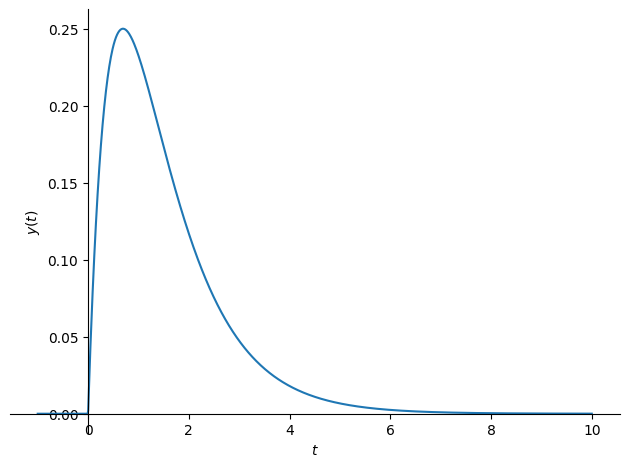

In [3]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');

La respuesta al impulso $h(t)$ se puede calcular resolviendo la EDO para un impulso de Dirac como señal de entrada, $x(t)=\delta(t)$.

In [4]:
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

        -t     
h(t) = ℯ  ⋅θ(t)

Se grafica la respuesta al impulso $h(t)$ del SLIT:

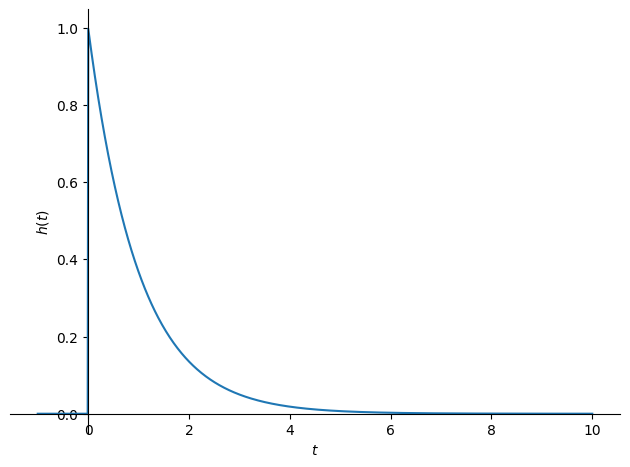

In [5]:
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

Como alternativa a la solución explícita de la EDO, la respuesta del sistema se calcula evaluando la convolución $y(t)=x(t)*h(t)$.

**Nota**:Dado que `SymPy` no puede manejar la función Heaviside de manera adecuada en las integrales, la integral de convolución se simplifica primero. Tanto la señal de entrada $x(t)$ como la respuesta de impulso $h(t)$ son señales causales. Por lo tanto, la integral de convolución resulta en

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

Para $t\geq0$. Observe que $y(t)=0$ para $t<0$.

In [6]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

 -t    -2⋅t
ℯ   - ℯ    

Se grafica la señal de salida obtenida mediante el proceso de convolución:

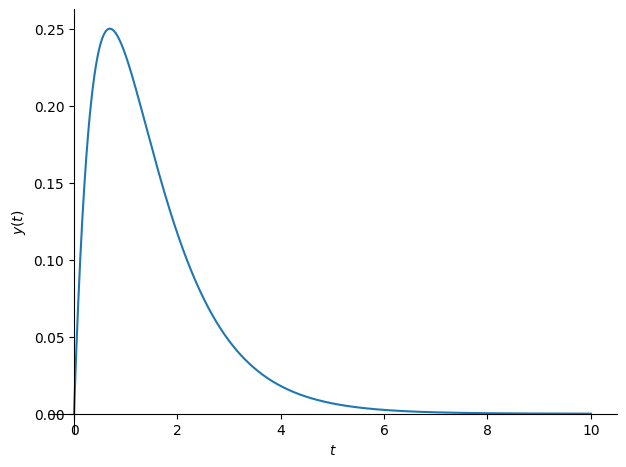

In [7]:
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');

**Ejercicio**

* Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?
* Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.
* Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

Solución ejercicios

 #1_EDO:

In [8]:
%matplotlib inline
import sympy as sym
sym.init_printing()
t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

In [9]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t)
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

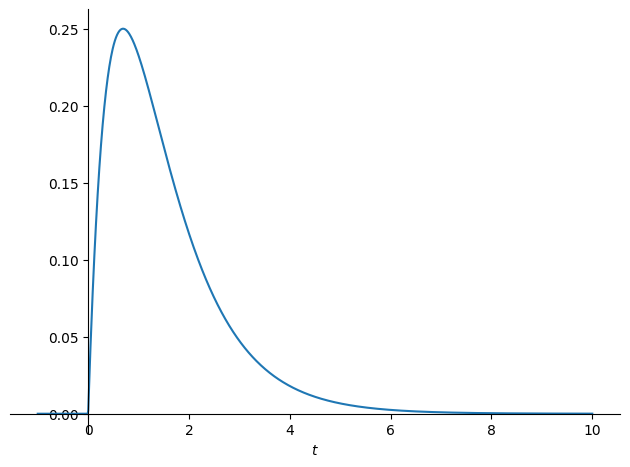

In [10]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'');

In [11]:

h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h


        -t     
h(t) = ℯ  ⋅θ(t)

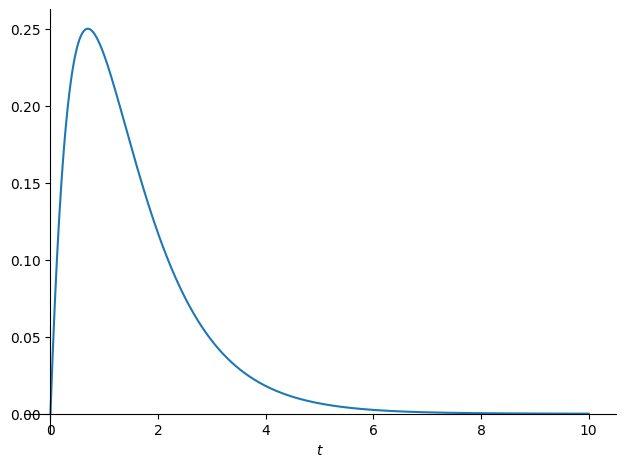

In [12]:

tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2
sym.plot(y2, (t,0,10), ylabel=r'');

Al comparar las gráficas resultantes de la resolución de la EDO y del proceso de convolución, se observa que coinciden. Esto demuestra que ambos métodos, tanto la solución directa de la EDO como el cálculo de la salida mediante la convolución, son precisos y coherentes. La coincidencia de las gráficas valida que la teoría se refleja correctamente en la práctica en este caso.

Solución Ejercicio #2


Se procede a resolver EDO que es:

$$
\mathcal{L}\{y\} + \mathcal{L}\left\{\frac{d}{dt}y\right\} = \mathcal{L}\{\delta(t)\}
$$

Sabemos que:

$$
\mathcal{L}\{\delta(t)\} = 1
$$

Así que:

$$
Y(s) + (sY(s) - y(0)) = 1
$$

Suponiendo condiciones iniciales cero y(0) = 0:

*   Elemento de lista
*   Elemento de lista



$$
Y(s) + sY(s) = 1
$$

$$
Y(s)(1 + s) = 1
$$

$$
Y(s) = \frac{1}{1 + s}
$$

La transformada inversa de Laplace de \begin{equation}Y(s) = \frac{1}{1 + s} \end{equation} es:

$$
h(t) = e^{-t} \cdot u(t)
$$

Donde u(t) es la función escalón de Heaviside.

Después se calcula la derivada:

$$
\frac{d}{dt} h(t) = -e^{-t} \cdot u(t) + e^{-t} \cdot \delta(t)
$$

Por último se sustituye en EDO:

$$
y(t) = e^{-t} \cdot u(t)
$$


$$
\frac{d}{dt} y(t) = -e^{-t} \cdot u(t) + e^{-t} \cdot \delta(t)
$$

$$
y(t) + \frac{d}{dt} y(t) = e^{-t} \cdot u(t) - e^{-t} \cdot u(t) + e^{-t} \cdot \delta(t)
$$

$$
y(t) + \frac{d}{dt} y(t) = e^{-t} \cdot \delta(t) = \delta(t)
$$

Esto confirma que

$$
h(t) = e^{-t} \cdot u(t)
$$

es una solución válida para la EDO dada cuando

$$
x(t) = \delta(t)
$$

**Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.**

Se tiene una ecuación diferencial ordinaria (EDO) dada por:

$$
y(t) + \frac{d}{dt} y(t) = x(t)
$$

donde x(t) es una entrada.

Las entradas que se consideran son:


$$
x(t) = e^{-2t} \cdot u(t)
$$


$$
x(t) = \delta(t)
$$

La solución general de la EDO es:

$$
y(t) = \text{solución de la EDO con } x(t) = e^{-2t} \cdot u(t)
$$

Usando SymPy, se puede obtenerla siguiente solución y grafica:

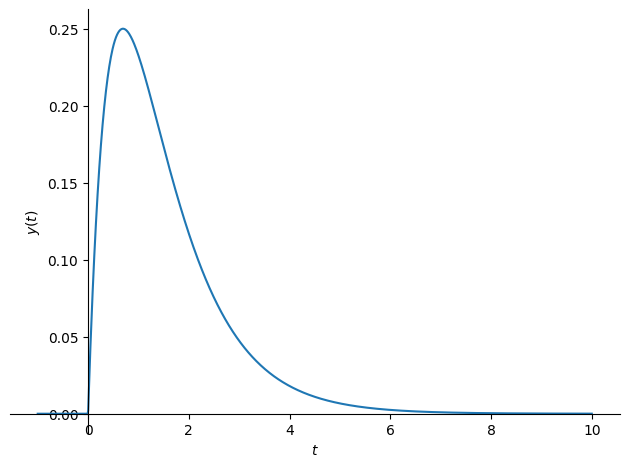

In [13]:
%matplotlib inline
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

sym.init_printing()
t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)
ode = sym.Eq(y + y.diff(t), x)

# Resolver la EDO con x(t) = e^{-2t} * u(t)
x1 = sym.exp(-2*t) * sym.Heaviside(t)
solution = sym.dsolve(ode.subs(x, x1))
# Definir condiciones iniciales
integration_constants = sym.solve((solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1')
y1 = solution.subs(integration_constants)
y1

# Graficar la solución
sym.plot(y1.rhs, (t, -1, 10), ylabel=r'$y(t)$')

La solución de la EDO con

$$
x(t) = \delta(t)
$$

es:

$$
h(t) = \text{solución de la EDO con } x(t) = \delta(t)
$$

Para obtener la respuesta al sistema dada una entrada
x(t) y la respuesta al impulso h(t), utilizamos la convolución:

$$
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \, d\tau
$$

En el caso de

$$
x(t) = e^{-2t} \cdot u(t)
$$

y h(t), la integral de convolución es:

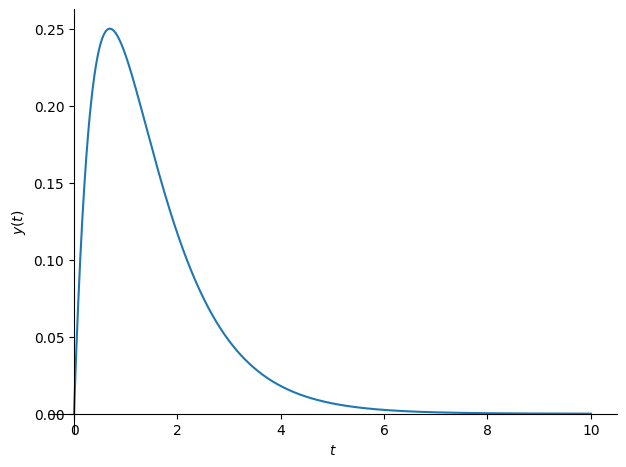

In [14]:
# Resolver la EDO con x(t) = δ(t)
h = sym.Function('h')(t)
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants = sym.solve((solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1')
h = solution2.subs(integration_constants)
h

# Calcular la integral de convolución
tau = sym.symbols('tau', real=True)
y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
y2

# Graficar la integral de convolución
sym.plot(y2, (t, 0, 10), ylabel=r'$y(t)$')

Para verificar manualmente la integral de convolución, primero calcula la respuesta al impulso h(t) de la EDO con

$$
x(t) = \delta(t)
$$

Luego, se evalúa la integral de convolución utilizando:

$$
y(t) = \int_{0}^{t} e^{-2\tau} \cdot h(t - \tau) \, d\tau
$$

Se comprueba que y(t) calculado por convolución coincide con la solución
y(t) obtenida para

$$
x(t) = e^{-2t} \cdot u(t)
$$

Ahora se compara la solucion numerica y manual

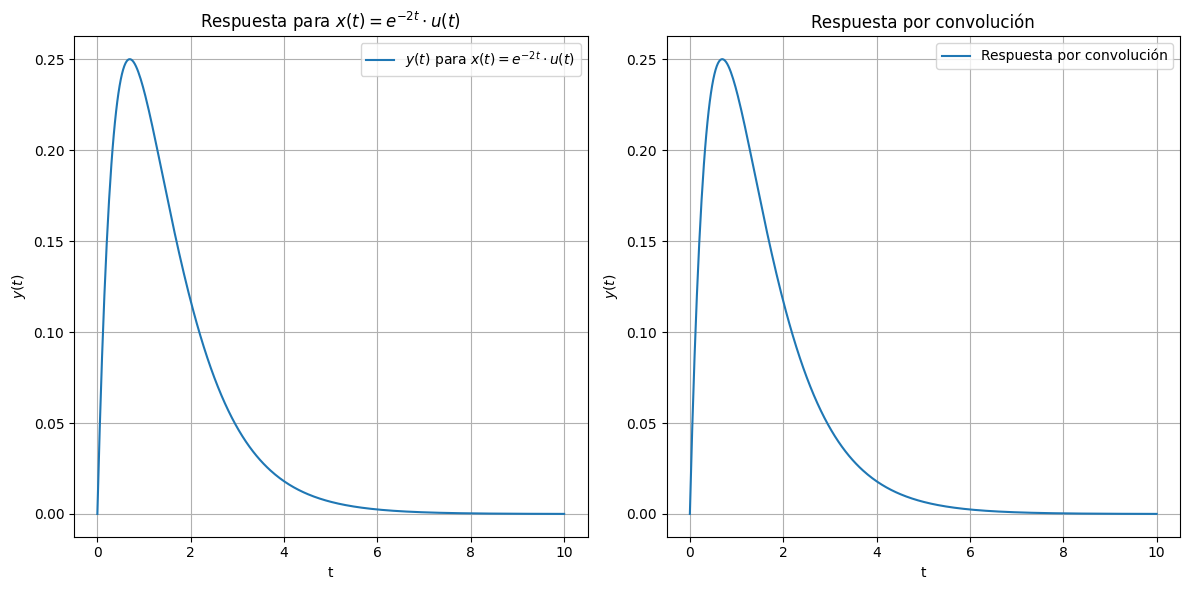

In [15]:
# Crear valores para graficar
t_values = np.linspace(0, 10, 400)

# Convertir y1 a una función numérica usando lambdify
y1_func = sym.lambdify(t, y1.rhs, 'numpy')
y1_values = y1_func(t_values)

# Calcular y2 numéricamente
y2_func = sym.lambdify(t, y2, 'numpy')
y2_values = y2_func(t_values)

# Graficar las soluciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, y1_values, label='$y(t)$ para $x(t) = e^{-2t} \cdot u(t)$')
plt.xlabel('t')
plt.ylabel('$y(t)$')
plt.title('Respuesta para $x(t) = e^{-2t} \cdot u(t)$')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_values, y2_values, label='Respuesta por convolución')
plt.xlabel('t')
plt.ylabel('$y(t)$')
plt.title('Respuesta por convolución')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Las soluciones obtenidas por ambos métodos coinciden, validando el uso de la convolución para sistemas lineales e invariantes en el tiempo. Esta coincidencia confirma la exactitud de los resultados y la aplicabilidad del método de convolución en el análisis de sistemas dinámicos.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.